In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings 
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn as skl
import imblearn as im
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
#Importing training data and test data

df_train = pd.read_csv('C:/Users/aish2/OneDrive/Desktop/Python project FINAL/credit_train.csv')
df_test = pd.read_csv('C:/Users/aish2/OneDrive/Desktop/Python project FINAL/credit_test.csv')

In [4]:
#Getting information about the training data
df_train.info()
df_train.isnull().sum()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

(100514, 19)

In [5]:
Summary = pd.DataFrame(df_train.describe())
Summary

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  80846.000000   8.084600e+04  100000.000000   
mean          1.176045e+07   1076.456089   1.378277e+06   18472.412336   
std           3.178394e+07   1475.403791   1.081360e+06   12174.992609   
min           1.080200e+04    585.000000   7.662700e+04       0.000000   
25%           1.796520e+05    705.000000   8.488440e+05   10214.162500   
50%           3.122460e+05    724.000000   1.174162e+06   16220.300000   
75%           5.249420e+05    741.000000   1.650663e+06   24012.057500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

In [6]:
##EDA

##### Correlation Plot

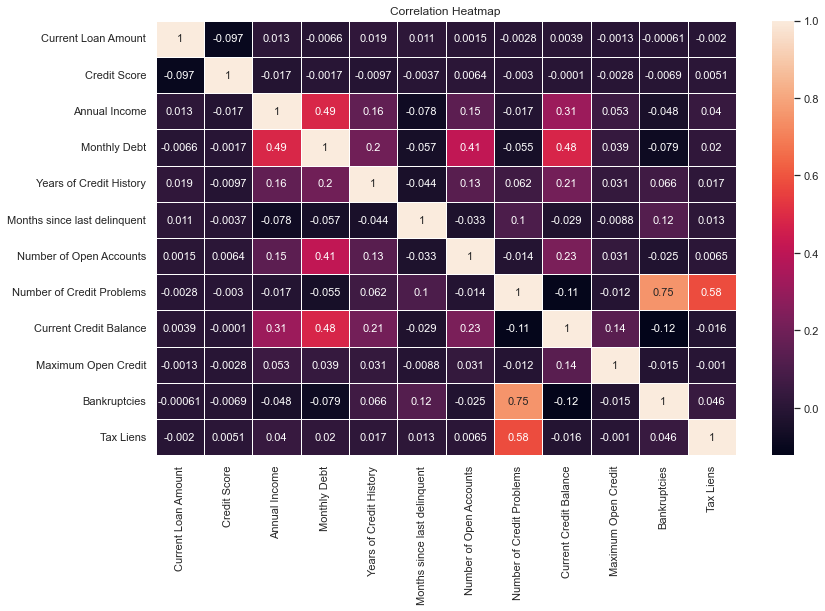

In [7]:
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(df_train.corr(),annot=True, linewidths=1, annot_kws={"size":11})
plt.pyplot.title('Correlation Heatmap')
plt.pyplot.show()

###### Histogram of Years of credit history vs Customer Count

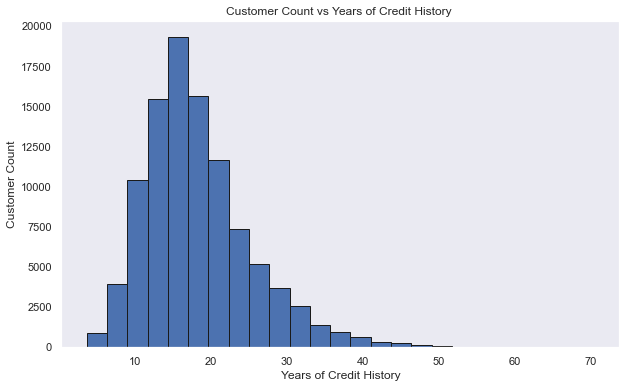

In [8]:
df_train.hist(column='Years of Credit History', bins=25, grid=False, figsize=(10,6), edgecolor = 'k')
plt.pyplot.xlabel('Years of Credit History')
plt.pyplot.ylabel('Customer Count')
plt.pyplot.title('Customer Count vs Years of Credit History ')
plt.pyplot.show()

In [9]:
#The above graph is normally distributed with outliers greater than 50 years of credit history , 
#therefore we removed values >50 in year of credit history

##### Box Plot of Current Loan Amount

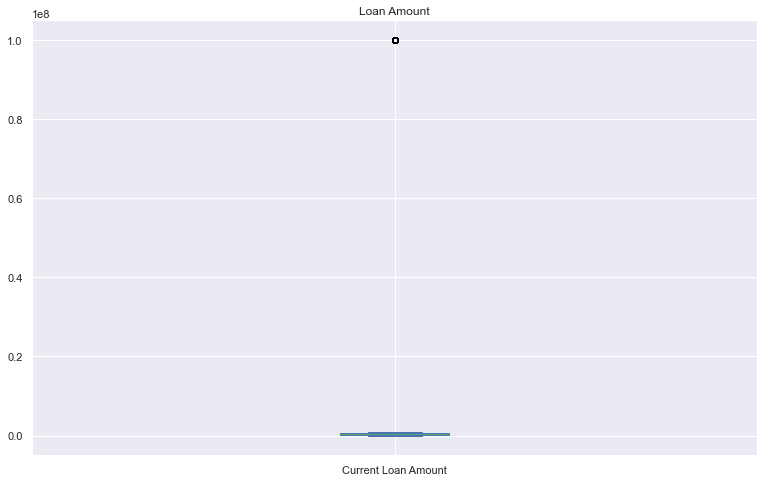

In [10]:
df_train['Current Loan Amount'].plot(kind='box', title='Loan Amount')
#plt.pyplot.ylim(0,1)
plt.pyplot.show()

In [11]:
#removed outlier of current loan amount = 99999999.0

###### Stacked bar chart of Loan Status for years in current job

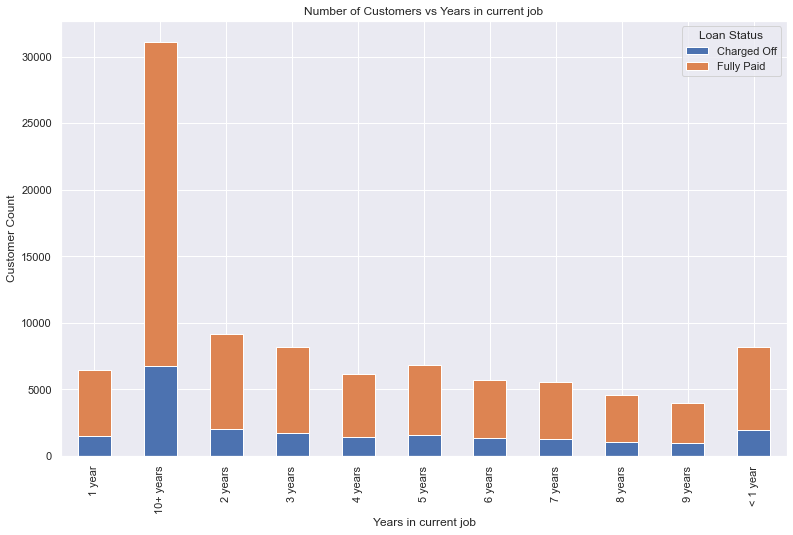

In [12]:
df_train.groupby('Years in current job')['Loan Status'].value_counts().unstack(level=1).plot.bar(stacked=True)
plt.pyplot.ylabel('Customer Count')
plt.pyplot.title('Number of Customers vs Years in current job')
plt.pyplot.show()

In [13]:
#There is similar Loan status proportion amongst all the Years in current job 

##### Bar Chart of Loan Status

[Text(0.5, 1.0, 'Customer count vs Loan Status')]

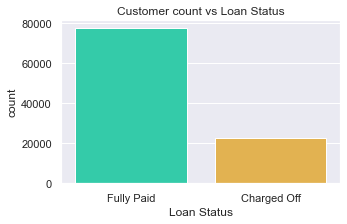

In [14]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(data=df_train, x='Loan Status', palette='turbo').set(title='Customer count vs Loan Status')

In [15]:
df_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [16]:
#The decision variable which is loan status has majority of data inclined towards "Fully paid" category which inturn would result in overfitting of data ,
# to resolve this issue , we performed resampling

#### Data Cleaning 

In [17]:
def DataCleaning(df):
        ##Filtering out outlier data for credit score using Boolean Mask
        mask = df['Credit Score'] <=850
        df = df[mask]

        ##Filtering out value of Current Loan Amount that is not equal to 99999999.0
        df = df[df['Current Loan Amount'] != 99999999.0]

        ##Filtering out outlier data for Years of Credit History using Boolean Mask

        df = df[df['Years of Credit History'] <=50]

        ##Filtering null values 
        #df['Bankruptcies'].dropna(inplace=True)
        #df['Years in current job'].dropna(inplace=True)

        ##Adding null values with zero
        df['Years in current job'].fillna(0,inplace=True)

        ##Removing redundant columns
        df.drop(columns=['Loan ID','Customer ID'],inplace=True)
        df.drop(columns='Months since last delinquent',inplace=True)

        ##Filtering out values of Years in current job that is not equal to 0
        df = df[df['Years in current job'] != 0]

        ##Adding null values of Bankruptcies column with 10 for subsequent filtering
        df['Bankruptcies'].fillna(10,inplace=True)

         ##Filtering out values of Bankruptcies that is not equal to 10
        df = df[df['Bankruptcies'] != 10]

        ##Encoding values of Term, Years in current job, Purpose, Home Ownership
        df['Term'].replace(to_replace=['Short Term', 'Long Term'], value=[1,0],inplace=True)
        df['Years in current job'].replace(to_replace=['8 years', '3 years', '< 1 year', '2 years', '10+ years',
       '4 years', '5 years', '1 year', '7 years', '6 years', '9 years'], value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
        df['Home Ownership'].replace(to_replace=['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], value=[1,2,3,4],inplace=True)
        df['Purpose'].replace(to_replace=['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Take a Trip', 'Other', 'Business Loan', 'Buy a Car',
       'small_business', 'Medical Bills', 'vacation',
       'Educational Expenses', 'wedding', 'major_purchase', 'moving',
       'renewable_energy'], value=[1,2,3,4,5,4,6,7,8,9,10,11,12,13,14,15],inplace=True)

        ##Replacing column header names
        df.columns = df.columns.str.replace(' ', '_')
        return df


#####TRAINING DATA#####
##Encoding Loan Status Categorical variable with 0 and 1
df_train['Loan Status'] = df_train['Loan Status'].replace(to_replace=['Fully Paid','Charged Off'],value=[1,0])

df_train = DataCleaning(df_train)
df_train

####TEST DATA#####
df_test = DataCleaning(df_test)
df_test

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
9992             428604.0     0         697.0      2183043.0   
9993             220858.0     1         737.0      1234088.0   
9994             442596.0     1         739.0      1528968.0   
9995             157806.0     1         731.0      1514376.0   
9996             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
9992                    10               1        2      16882.07   
9993                     3               3        2      20362.49   
9994                     9               1        2      19494.38   
9995                    10               3        2       4795.41   
9996                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
9992                     22.1                     10.0   
9993                      9.5                     10.0   
9994                     16.7                     11.0   
9995                     12.5                      9.0   
9996                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
9992                        0.0                385187.0             525316.0   
9993                        0.0                273353.0             409442.0   
9994                        0.0                419235.0             656876.0   
9995                        0.0                 87058.0             234410.0   
9996                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              1.0        0.0  
4              0.0        0.0  
...            ...        ...  
9992           0.0        0.0  
9993           0.0        0.0  
9994           0.0        0.0  
9995           0.0        0.0  
9996           0.0        0.0  

[6139 rows x 15 columns]

##### Correlation Plot post cleaning 

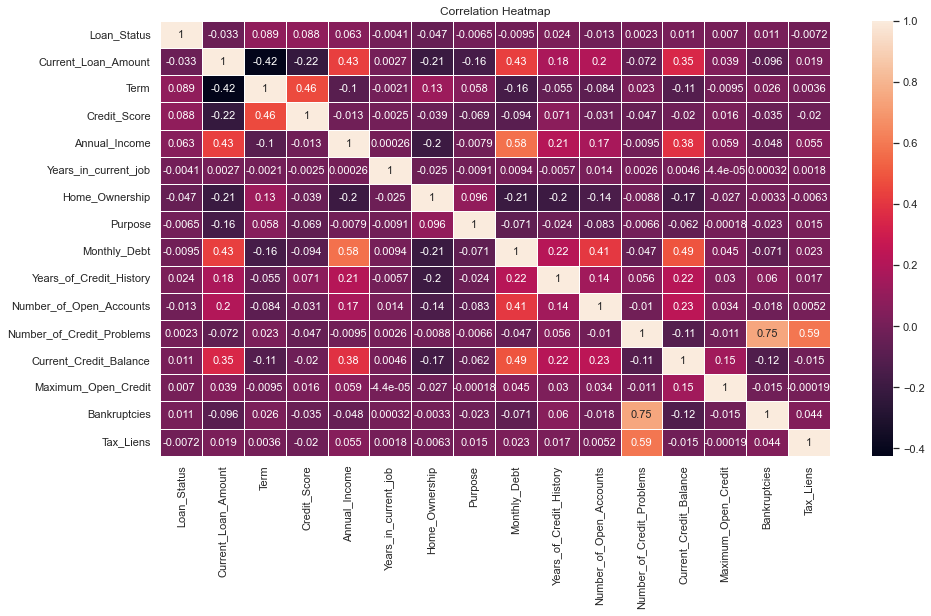

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(),annot=True, linewidths=1, annot_kws={"size":11})
plt.pyplot.title('Correlation Heatmap')
plt.pyplot.show()

## Logistic Regression

In [19]:
##Creating X and y variable where X is the independent variable and y is the dependent variable
X = df_train[['Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']]
y = df_train['Loan_Status']

In [20]:
#Creating object for LogisticRegression()
logreg = LogisticRegression()

#Using train_test_split to partition the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(43337, 15)
(43337,)


In [21]:
##Model Fitting
logreg.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = logreg.predict(X_test)

In [23]:
np.count_nonzero(y_pred)

18574

In [24]:
np.unique(y_pred, return_counts=True)

(array([1.]), array([18574], dtype=int64))

In [25]:
prob_accuracy_score = skl.metrics.accuracy_score(y_test,y_pred)
prob_accuracy_score

0.8103801012167546

In [26]:
#Decision variable Loan Status count before data resampling
y.value_counts()

1.0    49997
0.0    11914
Name: Loan_Status, dtype: int64

In [27]:
## Using RandomOverSampler we are trying to resolve over sampling by adding duplicate rows from minority class in the data.
over_sampling = im.over_sampling.RandomOverSampler(sampling_strategy=0.7)
X_over_sampling, y_over_sampling = over_sampling.fit_resample(X,y)

In [28]:
#Decision variable Loan Status count after data resampling
y_over_sampling.value_counts()

1.0    49997
0.0    34997
Name: Loan_Status, dtype: int64

In [29]:
print(X_over_sampling.shape)
print(y_over_sampling.shape)

(84994, 15)
(84994,)


In [30]:
logreg.fit(X_over_sampling,y_over_sampling)
y_pred_over = logreg.predict(X_test)

In [31]:
y_pred_over

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
np.unique(y_pred_over, return_counts=True)

(array([0., 1.]), array([ 1493, 17081], dtype=int64))

In [33]:
prob_accuracy_score_over = skl.metrics.accuracy_score(y_test,y_pred_over)
prob_accuracy_score_over

0.7747927210078605

In [109]:
df_test

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
9992             428604.0     0         697.0      2183043.0   
9993             220858.0     1         737.0      1234088.0   
9994             442596.0     1         739.0      1528968.0   
9995             157806.0     1         731.0      1514376.0   
9996             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
9992                    10               1        2      16882.07   
9993                     3               3        2      20362.49   
9994                     9               1        2      19494.38   
9995                    10               3        2       4795.41   
9996                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
9992                     22.1                     10.0   
9993                      9.5                     10.0   
9994                     16.7                     11.0   
9995                     12.5                      9.0   
9996                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
9992                        0.0                385187.0             525316.0   
9993                        0.0                273353.0             409442.0   
9994                        0.0                419235.0             656876.0   
9995                        0.0                 87058.0             234410.0   
9996                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              1.0        0.0  
4              0.0        0.0  
...            ...        ...  
9992           0.0        0.0  
9993           0.0        0.0  
9994           0.0        0.0  
9995           0.0        0.0  
9996           0.0        0.0  

[6139 rows x 15 columns]

In [110]:
#Predict the loan status outcome on new dataset for recommendation

In [111]:
recom = logreg.predict(df_test)

In [112]:
recom

array([1., 1., 1., ..., 1., 1., 1.])

In [113]:
#Adding loan status predicted values as a column in the existing data
df_test.reset_index(drop=True, inplace = True)

In [114]:
df_prediction_recom = pd.DataFrame(recom)

In [115]:
df_Logistic_final=pd.concat([df_test, df_prediction_recom], axis=1)
df_Logistic_final

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
6134             428604.0     0         697.0      2183043.0   
6135             220858.0     1         737.0      1234088.0   
6136             442596.0     1         739.0      1528968.0   
6137             157806.0     1         731.0      1514376.0   
6138             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
6134                    10               1        2      16882.07   
6135                     3               3        2      20362.49   
6136                     9               1        2      19494.38   
6137                    10               3        2       4795.41   
6138                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
6134                     22.1                     10.0   
6135                      9.5                     10.0   
6136                     16.7                     11.0   
6137                     12.5                      9.0   
6138                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
6134                        0.0                385187.0             525316.0   
6135                        0.0                273353.0             409442.0   
6136                        0.0                419235.0             656876.0   
6137                        0.0                 87058.0             234410.0   
6138                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens    0  
0              0.0        0.0  1.0  
1              0.0        0.0  1.0  
2              0.0        0.0  1.0  
3              1.0        0.0  1.0  
4              0.0        0.0  1.0  
...            ...        ...  ...  
6134           0.0        0.0  1.0  
6135           0.0        0.0  1.0  
6136           0.0        0.0  1.0  
6137           0.0        0.0  1.0  
6138           0.0        0.0  1.0  

[6139 rows x 16 columns]

In [116]:
df_Logistic_final.rename(columns={0:'Loan Status Predicted'},inplace=True)
df_Logistic_final

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
6134             428604.0     0         697.0      2183043.0   
6135             220858.0     1         737.0      1234088.0   
6136             442596.0     1         739.0      1528968.0   
6137             157806.0     1         731.0      1514376.0   
6138             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
6134                    10               1        2      16882.07   
6135                     3               3        2      20362.49   
6136                     9               1        2      19494.38   
6137                    10               3        2       4795.41   
6138                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
6134                     22.1                     10.0   
6135                      9.5                     10.0   
6136                     16.7                     11.0   
6137                     12.5                      9.0   
6138                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
6134                        0.0                385187.0             525316.0   
6135                        0.0                273353.0             409442.0   
6136                        0.0                419235.0             656876.0   
6137                        0.0                 87058.0             234410.0   
6138                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens  Loan Status Predicted  
0              0.0        0.0                    1.0  
1              0.0        0.0                    1.0  
2              0.0        0.0                    1.0  
3              1.0        0.0                    1.0  
4              0.0        0.0                    1.0  
...            ...        ...                    ...  
6134           0.0        0.0                    1.0  
6135           0.0        0.0                    1.0  
6136           0.0        0.0                    1.0  
6137           0.0        0.0                    1.0  
6138           0.0        0.0                    1.0  

[6139 rows x 16 columns]

In [117]:
df_Logistic_final['Loan Status Predicted'].value_counts()

1.0    5723
0.0     416
Name: Loan Status Predicted, dtype: int64

In [118]:
#adding loan status name column for making piechart
df_Logistic_final['Loan_Status_Name'] = np.where(df_Logistic_final['Loan Status Predicted'] == 1, "Fully Paid", "Charged off")

In [119]:
#quality check
df_Logistic_final['Loan_Status_Name'].value_counts()

Fully Paid     5723
Charged off     416
Name: Loan_Status_Name, dtype: int64

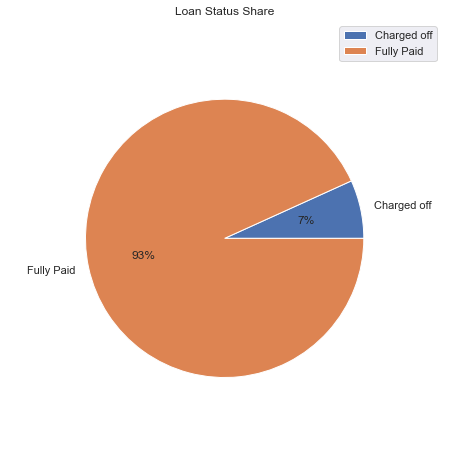

In [120]:
#pie chart of the predicted values (% split)
df_Logistic_final.groupby('Loan_Status_Name').count().plot(kind='pie',y='Loan Status Predicted',autopct='%1.0f%%',
                                                           title='Loan Status Share',radius = 0.8)
plt.pyplot.ylabel("")
plt.pyplot.show()

# Decision Tree Algorithm

In [38]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt.fit(X_over_sampling, y_over_sampling)

# making predictions

prediction = dt.predict(X_over_sampling)
print('Prediction {}'.format(prediction))

Prediction [1. 0. 1. ... 1. 1. 1.]


In [39]:
y_over_names = ['Fully Paid','Charged Off' ]
X_over_names = list(X_over_sampling.columns)

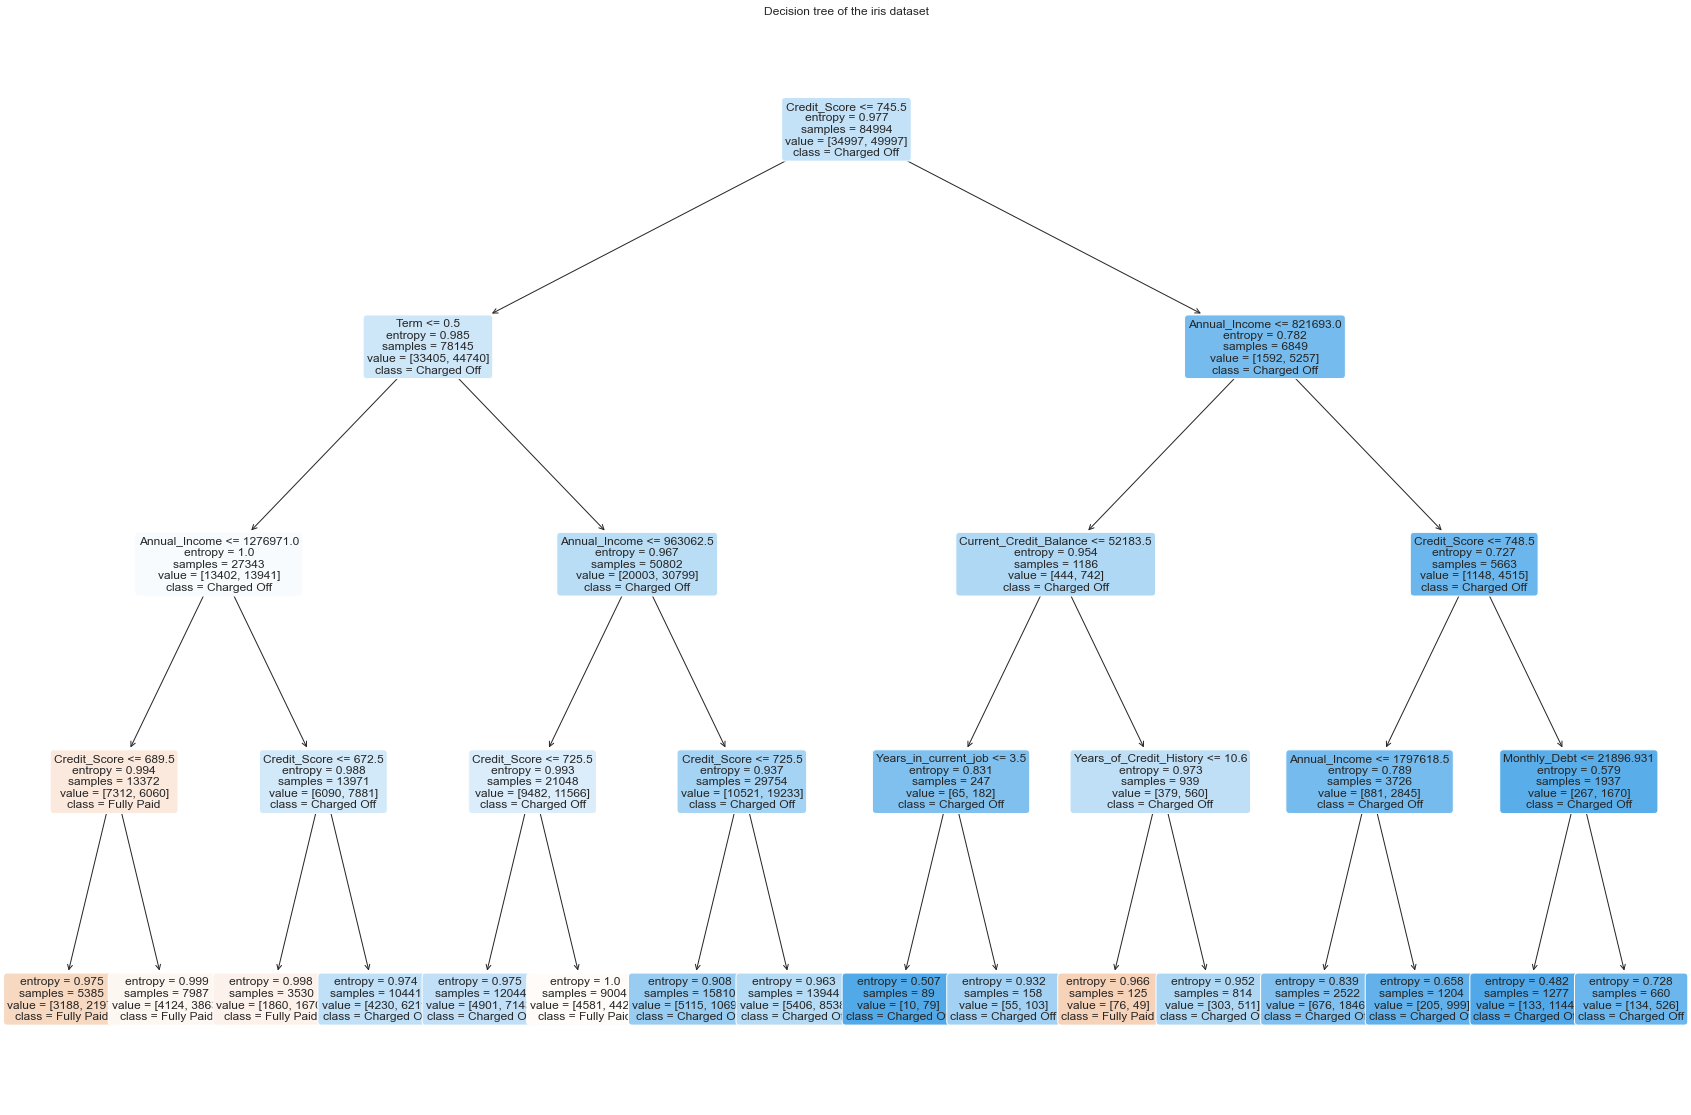

In [40]:
plt.pyplot.figure(figsize=(30, 20))
plot_tree(dt, filled=True, fontsize=12, feature_names=X_over_names, 
          rounded=True, class_names = y_over_names)
plt.pyplot.title("Decision tree of the iris dataset")
plt.pyplot.show()

In [41]:
from sklearn.model_selection import train_test_split

X_train_dec, X_test_dec, y_train_dec, y_test_dec =train_test_split(X_over_sampling, y_over_sampling, test_size=0.3,random_state=21, stratify=y_over_sampling)

In [42]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=20)
test = dt.fit(X_train_dec, y_train_dec)
y_pred = dt.predict(X_test_dec)
print("Test set predictions:\n {}".format(y_pred))
dt.score(X_test_dec, y_test_dec)

Test set predictions:
 [1. 0. 1. ... 1. 0. 0.]


0.7676771638103455

In [43]:
test.feature_importances_

array([0.12807925, 0.00923562, 0.10144982, 0.13971728, 0.0508821 ,
       0.01719417, 0.02219935, 0.1180383 , 0.10617284, 0.06554637,
       0.00728338, 0.1083772 , 0.11672202, 0.00692295, 0.00217935])

In [44]:
prediction_decision_tree = dt.predict(df_test)

In [45]:
prediction_decision_tree

array([1., 1., 1., ..., 0., 0., 1.])

In [46]:
type(df_test)

pandas.core.frame.DataFrame

In [47]:
df_test.reset_index(drop=True, inplace = True)

In [48]:
prediction_decision_tree.shape

(6139,)

In [49]:
df_test.shape

(6139, 15)

In [50]:
df_prediction_decision_tree = pd.DataFrame(prediction_decision_tree)

In [51]:
df_DecisionTree_Final=pd.concat([df_test, df_prediction_decision_tree], axis=1)
df_DecisionTree_Final

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
6134             428604.0     0         697.0      2183043.0   
6135             220858.0     1         737.0      1234088.0   
6136             442596.0     1         739.0      1528968.0   
6137             157806.0     1         731.0      1514376.0   
6138             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
6134                    10               1        2      16882.07   
6135                     3               3        2      20362.49   
6136                     9               1        2      19494.38   
6137                    10               3        2       4795.41   
6138                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
6134                     22.1                     10.0   
6135                      9.5                     10.0   
6136                     16.7                     11.0   
6137                     12.5                      9.0   
6138                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
6134                        0.0                385187.0             525316.0   
6135                        0.0                273353.0             409442.0   
6136                        0.0                419235.0             656876.0   
6137                        0.0                 87058.0             234410.0   
6138                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens    0  
0              0.0        0.0  1.0  
1              0.0        0.0  1.0  
2              0.0        0.0  1.0  
3              1.0        0.0  0.0  
4              0.0        0.0  0.0  
...            ...        ...  ...  
6134           0.0        0.0  0.0  
6135           0.0        0.0  1.0  
6136           0.0        0.0  0.0  
6137           0.0        0.0  0.0  
6138           0.0        0.0  1.0  

[6139 rows x 16 columns]

In [52]:
df_DecisionTree_Final.rename(columns={0:'Loan Status Predicted'},inplace=True)
df_DecisionTree_Final

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
6134             428604.0     0         697.0      2183043.0   
6135             220858.0     1         737.0      1234088.0   
6136             442596.0     1         739.0      1528968.0   
6137             157806.0     1         731.0      1514376.0   
6138             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
6134                    10               1        2      16882.07   
6135                     3               3        2      20362.49   
6136                     9               1        2      19494.38   
6137                    10               3        2       4795.41   
6138                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
6134                     22.1                     10.0   
6135                      9.5                     10.0   
6136                     16.7                     11.0   
6137                     12.5                      9.0   
6138                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
6134                        0.0                385187.0             525316.0   
6135                        0.0                273353.0             409442.0   
6136                        0.0                419235.0             656876.0   
6137                        0.0                 87058.0             234410.0   
6138                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens  Loan Status Predicted  
0              0.0        0.0                    1.0  
1              0.0        0.0                    1.0  
2              0.0        0.0                    1.0  
3              1.0        0.0                    0.0  
4              0.0        0.0                    0.0  
...            ...        ...                    ...  
6134           0.0        0.0                    0.0  
6135           0.0        0.0                    1.0  
6136           0.0        0.0                    0.0  
6137           0.0        0.0                    0.0  
6138           0.0        0.0                    1.0  

[6139 rows x 16 columns]

In [53]:
# Comparing cols to check the output % match of logistic regression output and decision tree output
output_comparison = recom==prediction_decision_tree
output_comparison_Series= pd.Series(output_comparison)

In [54]:
output_comparison_Series.value_counts()

True     4598
False    1541
dtype: int64

In [55]:
#Percentage of matched output
output_comparison_Series.value_counts(normalize=True)

True     0.748982
False    0.251018
dtype: float64

In [56]:
df_Logistic_final

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0                611314.0     1         747.0      2074116.0   
1                266662.0     1         734.0      1919190.0   
2                153494.0     1         709.0       871112.0   
3                176242.0     1         727.0       780083.0   
4                321992.0     1         744.0      1761148.0   
...                   ...   ...           ...            ...   
6134             428604.0     0         697.0      2183043.0   
6135             220858.0     1         737.0      1234088.0   
6136             442596.0     1         739.0      1528968.0   
6137             157806.0     1         731.0      1514376.0   
6138             132550.0     1         718.0       763192.0   

      Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                        5               1        2      42000.83   
1                        5               1        2      36624.40   
2                        4               3        2       8391.73   
3                        5               3        2      16771.87   
4                        5               1        2      39478.77   
...                    ...             ...      ...           ...   
6134                    10               1        2      16882.07   
6135                     3               3        2      20362.49   
6136                     9               1        2      19494.38   
6137                    10               3        2       4795.41   
6138                     6               1        2      12401.87   

      Years_of_Credit_History  Number_of_Open_Accounts  \
0                        21.8                      9.0   
1                        19.4                     11.0   
2                        12.5                     10.0   
3                        16.5                     16.0   
4                        26.0                     14.0   
...                       ...                      ...   
6134                     22.1                     10.0   
6135                      9.5                     10.0   
6136                     16.7                     11.0   
6137                     12.5                      9.0   
6138                      9.9                      8.0   

      Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                           0.0                621908.0            1058970.0   
1                           0.0                679573.0             904442.0   
2                           0.0                 38532.0             388036.0   
3                           1.0                156940.0             531322.0   
4                           0.0                359765.0             468072.0   
...                         ...                     ...                  ...   
6134                        0.0                385187.0             525316.0   
6135                        0.0                273353.0             409442.0   
6136                        0.0                419235.0             656876.0   
6137                        0.0                 87058.0             234410.0   
6138                        0.0                 74309.0             329692.0   

      Bankruptcies  Tax_Liens  Loan Status Predicted Loan_Status_Name  
0              0.0        0.0                    1.0       Fully Paid  
1              0.0        0.0                    1.0       Fully Paid  
2              0.0        0.0                    1.0       Fully Paid  
3              1.0        0.0                    1.0       Fully Paid  
4              0.0        0.0                    1.0       Fully Paid  
...            ...        ...                    ...              ...  
6134           0.0        0.0                    1.0       Fully Paid  
6135           0.0        0.0                    1.0       Fully Paid  
6136           0.0        0.0                    1.0       Fully Paid  
6137           0.0        0.0 

In [57]:
 df_Logistic_final.describe()  

Current_Loan_Amount         Term  Credit_Score  Annual_Income  \
count          6139.000000  6139.000000   6139.000000   6.139000e+03   
mean         314357.896074     0.706630    715.388988   1.400296e+06   
std          187150.000839     0.455344     28.310724   9.012255e+05   
min           21472.000000     0.000000    585.000000   8.109200e+04   
25%          171710.000000     0.000000    703.000000   8.673785e+05   
50%          268510.000000     1.000000    721.000000   1.208818e+06   
75%          435688.000000     1.000000    738.000000   1.689480e+06   
max          789030.000000     1.000000    751.000000   1.781535e+07   

       Years_in_current_job  Home_Ownership      Purpose   Monthly_Debt  \
count           6139.000000     6139.000000  6139.000000    6139.000000   
mean               5.424825        1.947386     2.471575   18890.317881   
std                2.570164        0.955682     1.607543   12479.140438   
min                1.000000        1.000000     1.000000       0.000000   
25%                4.000000        1.000000     2.000000   10470.330000   
50%                5.000000        2.000000     2.000000   16470.150000   
75%                7.000000        3.000000     2.000000   24493.850000   
max               11.000000        4.000000    15.000000  143526.570000   

       Years_of_Credit_History  Number_of_Open_Accounts  \
count              6139.000000              6139.000000   
mean                 17.922251                11.151816   
std                   6.649241                 5.081360   
min                   4.100000                 1.000000   
25%                  13.500000                 8.000000   
50%                  16.900000                10.000000   
75%                  21.500000                14.000000   
max                  50.000000                55.000000   

       Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
count                6139.000000            6.139000e+03         6.139000e+03   
mean                    0.158495            2.947903e+05         6.552538e+05   
std                     0.481794            4.085362e+05         1.022878e+06   
min                     0.000000            0.000000e+00         0.000000e+00   
25%                     0.000000            1.107510e+05         2.698960e+05   
50%                     0.000000            2.106910e+05         4.588100e+05   
75%                     0.000000            3.654935e+05         7.776340e+05   
max                    10.000000            1.623744e+07         3.752742e+07   

       Bankruptcies    Tax_Liens  Loan Status Predicted  
count   6139.000000  6139.000000            6139.000000  
mean       0.113699     0.026226               0.938426  
std        0.347368     0.258066               0.240399  
min        0.000000     0.000000               0.000000  
25%        0.000000     0.000000               1.000000  
50%        0.000000     0.000000               1.000000  
75%        0.000000     0.000000               1.000000  
max        3.000000     9.000000               1.000000

In [58]:
df_charged_off = df_Logistic_final[df_Logistic_final['Loan Status Predicted'] == 0]

(array([47., 91., 93., 71., 47., 11.,  8.,  5.,  1.]),
 array([ 705033,  955033, 1205033, 1455033, 1705033, 1955033, 2205033,
        2455033, 2705033, 2955033]),
 <BarContainer object of 9 artists>)

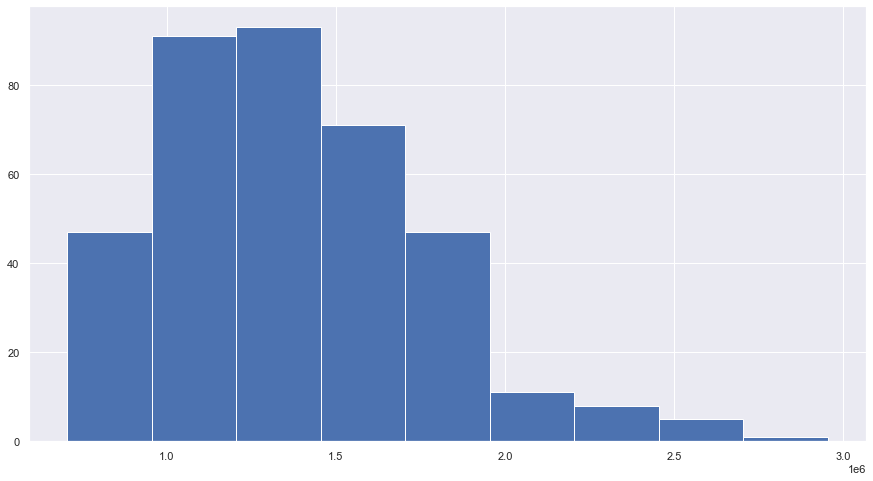

In [59]:
bins = [705033, 955033, 1205033, 1455033, 1705033, 1955033, 2205033, 2455033, 2705033, 2955033]
plt.pyplot.hist(df_charged_off["Annual_Income"], bins=bins)

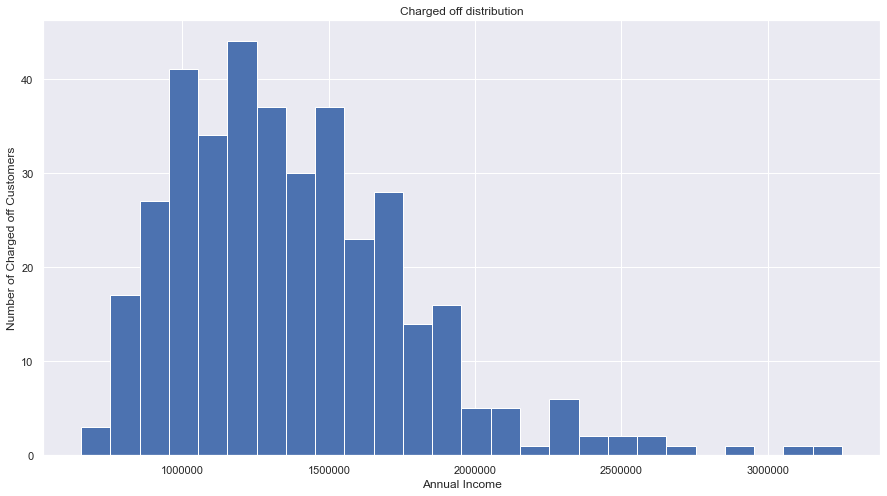

In [60]:
# df_charged_off["Annual_Income"].hist(bins=int)

# plt.hist(df_charged_off["Annual_Income"], bins=10)

w=100000

plt.pyplot.hist(df_charged_off["Annual_Income"], bins=np.arange(min(df_charged_off["Annual_Income"]), max(df_charged_off["Annual_Income"]) + w, w))
#plt.xticks(rotation =0)
plt.pyplot.ticklabel_format(style='plain')
plt.pyplot.title('Charged off distribution')
plt.pyplot.xlabel('Annual Income')
plt.pyplot.ylabel('Number of Charged off Customers')
plt.pyplot.show()


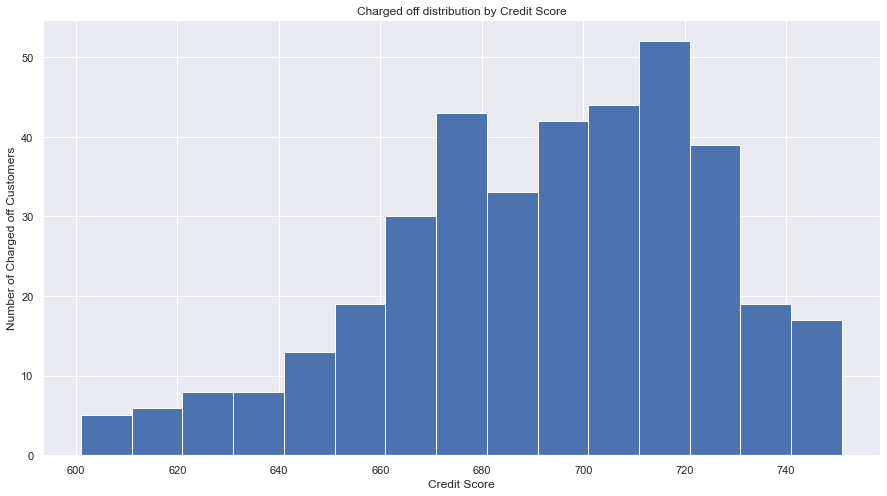

In [61]:

w=10

plt.pyplot.hist(df_charged_off["Credit_Score"], bins=np.arange(min(df_charged_off["Credit_Score"]), max(df_charged_off["Credit_Score"]) + w, w))
#plt.xticks(rotation =0)
plt.pyplot.ticklabel_format(style='plain')
plt.pyplot.title('Charged off distribution by Credit Score')
plt.pyplot.xlabel('Credit Score')
plt.pyplot.ylabel('Number of Charged off Customers')
plt.pyplot.show()

In [62]:
import plotly.express as px
fig = px.histogram(df_DecisionTree_Final, x="Credit_Score", title="Customers distribution by Credit Score", 
                   color="Loan Status Predicted",
                  color_discrete_sequence=['indianred','blue'])

fig.show()

In [63]:
##updating the legend names
newnames = {'1.0':'Fully paid', '0.0': 'Charged off'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )


In [64]:
import plotly.express as px
fig1 = px.histogram(df_Logistic_final, x="Credit_Score",
                   title="Charged off Customers distribution by Credit Score",
                   color="Loan Status Predicted",
                  color_discrete_sequence=['indianred','blue'])

fig1.show()

In [65]:
##updating the legend names
newnames = {'1.0':'Fully paid', '0.0': 'Charged off'}
fig1.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )


## KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_dec, y_train_dec)

KNeighborsClassifier(n_neighbors=6)

In [67]:
prediction_knn = knn.predict(X_test_dec)
 

In [68]:
X_test_dec

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
20998             176198.0     1         731.0      1141254.0   
71534             331584.0     1         683.0      1145472.0   
31444             444136.0     0         628.0      1582244.0   
44448             111144.0     1         690.0      1516466.0   
51025             258104.0     1         729.0      2229156.0   
...                    ...   ...           ...            ...   
19487             452848.0     0         682.0      1452664.0   
19907             326678.0     0         725.0      1410617.0   
41781             688930.0     1         747.0      9080784.0   
17546             274560.0     0         678.0      1035082.0   
71692             773784.0     0         661.0      2004785.0   

       Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
20998                     4               2        2       4013.37   
71534                    11               3        4      23673.05   
31444                     3               2        2      15941.00   
44448                     9               3       15      13142.68   
51025                     6               1        2      10476.98   
...                     ...             ...      ...           ...   
19487                    10               3        2       5677.39   
19907                     6               1        2      32091.38   
41781                     6               3        2     103672.36   
17546                     4               1        2      22167.87   
71692                     3               1        4      20381.87   

       Years_of_Credit_History  Number_of_Open_Accounts  \
20998                     16.5                      6.0   
71534                     24.0                      9.0   
31444                     19.5                     15.0   
44448                     29.9                      9.0   
51025                     20.7                      6.0   
...                        ...                      ...   
19487                     17.0                      5.0   
19907                     18.0                     15.0   
41781                     17.5                     19.0   
17546                     15.4                      7.0   
71692                     16.2                      9.0   

       Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
20998                        0.0                149834.0             198264.0   
71534                        0.0                631769.0             928334.0   
31444                        0.0                349847.0             461912.0   
44448                        0.0                186618.0             275638.0   
51025                        0.0                299744.0             438768.0   
...                          ...                     ...                  ...   
19487                        2.0                328757.0             491810.0   
19907                        0.0                466754.0             779878.0   
41781                        0.0               1057559.0            2148300.0   
17546                        0.0                199538.0             265870.0   
71692                        0.0                324330.0             654258.0   

       Bankruptcies  Tax_Liens  
20998           0.0        0.0  
71534           0.0        0.0  
31444           0.0        0.0  
44448           0.0        0.0  
51025           0.0        0.0  
...             ...        ...  
19487           0.0        2.0  
19907           0.0        0.0  
41781           0.0        0.0  
17546           0.0        0.0  
71692           0.0        0.0  

[25499 rows x 15 columns]

In [69]:
y_test_dec.shape

(25499,)

In [70]:
prediction_knn.shape

(25499,)

In [71]:
prediction_knn_df = pd.DataFrame(prediction_knn)
y_train_dec_df = pd.DataFrame(y_test_dec)
# prediction_knn = prediction_knn.reshape(-1,1)
# y_test_dec = y_test_dec.reshape(-1,1)
prediction_knn_df.shape
#y_train_dec_df.shape

(25499, 1)

In [72]:
score_knn = skl.metrics.accuracy_score(y_test_dec,prediction_knn_df)
score_knn


0.6369269383113063